# EXPERIMENT 3

Using 3 years rolling training dataset. Thus, if we have 20 years data, ML will be applied 17 times.

For 2000 through 2002, since there are no training set, we will use those three years as training dataset only.

17 times ML will be following.

 

1: training dataset is 2000 through 2002, and the testing set is 2003.

2: training dataset is 2001 through 2003, and the testing set is 2004.

3: training dataset is 2002 through 2004, and the testing set is 2005.

4: training dataset is 2003 through 2005, and the testing set is 2006.

5: training dataset is 2004 through 2006, and the testing set is 2007.

….. so on.

 

The motivation of the 1st and 2nd method that I suggested is to make the ML prediction more practical and realistic.

 

When we want to compare machine’s judgment, we don’t take a restrospective look. For instance, in 2013, when human predicts something, human’s learning is based on past couple of years (future years cannot be applied). We must apply the same restriction to ML.

In [47]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline

%matplotlib inline

In [48]:
data = pd.read_csv('D:/research-assistant/datasets/final.csv')
data.sort_values("year", axis = 0, ascending = True, inplace = True, na_position ='last') 
main_data = pd.get_dummies(data, columns=['year'])
main_data['year'] =  data['year']
main_shape = main_data.shape[1] - 1
X = main_data.iloc[:,range(0,main_shape)]
Y = main_data.iloc[:,main_shape]
data.head()

,Unnamed: 0,cik,year,size,ni,zscore,leverage,prloss,chgdt,cfo,...,litigate,reportlag,priorgc,newequity,newdebt,dependence,indexpert,tenure,big4,bankruptcy
0,39,1923,1999,4.633233,-0.457,-1.379207,0.782724,1,0.0,0.068627,...,0,88,0,0.029568,0.0,0.0,0,0.693147,1,False
266,62222,948070,1999,1.291709,0.074,-4.436830,0.296785,1,0.0,-0.017862,...,0,123,0,0.825776,0.0,0.0,0,0.693147,0,False
265,62215,948069,1999,4.775310,10.629,-4.376339,0.250027,1,0.0,-0.065780,...,0,92,0,0.088910,0.0,0.0,0,0.693147,1,False
264,61608,945446,1999,3.250994,-12.713,-2.122433,0.419352,1,0.0,-0.338124,...,0,65,0,0.000000,0.0,0.0,0,0.693147,1,False
263,61600,945439,1999,-0.404965,-1.153,3.463117,0.977511,1,0.0,-0.526237,...,0,92,0,10.487256,0.0,0.0,0,0.693147,0,False


In [49]:
data.year.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

### Breaking dataset

In [50]:
def data_breakup(dataset, year):
    train = pd.DataFrame()
    test = pd.DataFrame()
    train_year = year+3
    for i in range(year,train_year):
        new_data = dataset[dataset.year == i]
        train = train.append(new_data)
    test = dataset[dataset.year == train_year]
    data = pd.concat([train, test])
    data = data.drop(columns = ['bankruptcy','Unnamed: 0', 'cik', 'year'])
    return(train, test, data)

In [51]:
training_1999, testing_1999, data_1999 = data_breakup(data, 1999)
training_2000, testing_2000, data_2000 = data_breakup(data, 2000)
training_2001, testing_2001, data_2001 = data_breakup(data, 2001)
training_2002, testing_2002, data_2002 = data_breakup(data, 2002)
training_2003, testing_2003, data_2003 = data_breakup(data, 2003)
training_2004, testing_2004, data_2004 = data_breakup(data, 2004)
training_2005, testing_2005, data_2005 = data_breakup(data, 2005)
training_2006, testing_2006, data_2006 = data_breakup(data, 2006)
training_2007, testing_2007, data_2007 = data_breakup(data, 2007)
training_2008, testing_2008, data_2008 = data_breakup(data, 2008)
training_2009, testing_2009, data_2009 = data_breakup(data, 2009)
training_2010, testing_2010, data_2010 = data_breakup(data, 2010)
training_2011, testing_2011, data_2011 = data_breakup(data, 2011)
training_2012, testing_2012, data_2012 = data_breakup(data, 2012)
training_2013, testing_2013, data_2013 = data_breakup(data, 2013)
training_2014, testing_2014, data_2014 = data_breakup(data, 2014)
training_2015, testing_2015, data_2015 = data_breakup(data, 2015)

### Running a ML algorithm

In [52]:
def ml_model(train, test, data):
    train = train.drop(columns = ['Unnamed: 0','cik', "year"])
    test = test.drop(columns = ['Unnamed: 0','cik', "year"])
    shape = train.shape[1] - 1
    
    # splitting the dataset
    x_train = train.drop(columns = ['bankruptcy'])
    y_train = train['bankruptcy']
    x_test = test.drop(columns = ['bankruptcy'])
    y_test = test['bankruptcy']
    #print(x_train.head())

    #Testing dataset
    x_test = pd.DataFrame(x_test)
    y_test = pd.DataFrame(y_test)


    #Training dataset
    x_train = pd.DataFrame(x_train)
    y_train = pd.DataFrame(y_train)
    
    rf_model = RandomForestClassifier(random_state = 123, n_estimators = 500, criterion = 'entropy',max_leaf_nodes=1000, max_depth  = 15,  n_jobs=-1)
    rf_model.fit(x_train, y_train)
    y_pred_rf = rf_model.predict(x_test)
    y_pred_proba = rf_model.predict_proba(x_test)
    y_pred_proba = [p[1] for p in y_pred_proba]
    
    print(accuracy_score(y_test, y_pred_rf))
    print(classification_report(y_test,y_pred_rf))
    viz = ConfusionMatrix(rf_model)
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()
    scores = cross_val_score(rf_model, X, Y, cv=10)
    scores = scores.sum()/10
    data['rf_model'] =  rf_model.predict(data)
    
    
    print(scores)

0.9812108559498957
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       406
        True       0.98      0.89      0.94        73

    accuracy                           0.98       479
   macro avg       0.98      0.94      0.96       479
weighted avg       0.98      0.98      0.98       479



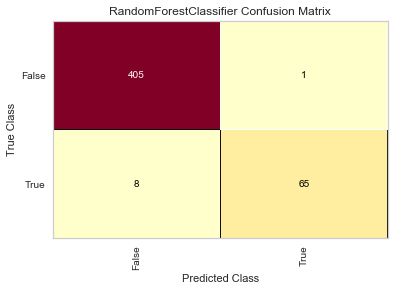

0.9990641711229946


In [53]:
ml_model(training_1999, testing_1999,  data_1999)

0.9955156950672646
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       191
        True       1.00      0.97      0.98        32

    accuracy                           1.00       223
   macro avg       1.00      0.98      0.99       223
weighted avg       1.00      1.00      1.00       223



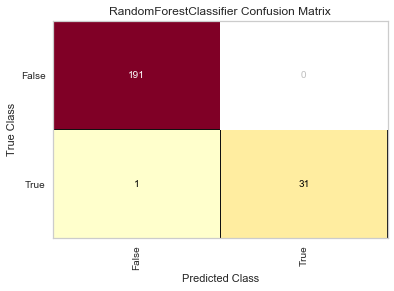

0.9990641711229946


In [54]:
ml_model(training_2000, testing_2000, data_2000)

0.9890710382513661
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       150
        True       1.00      0.94      0.97        33

    accuracy                           0.99       183
   macro avg       0.99      0.97      0.98       183
weighted avg       0.99      0.99      0.99       183



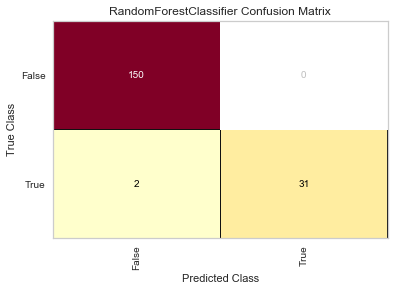

0.9990641711229946


In [55]:
ml_model(training_2001, testing_2001, data_2001)

0.9954545454545455
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       195
        True       1.00      0.96      0.98        25

    accuracy                           1.00       220
   macro avg       1.00      0.98      0.99       220
weighted avg       1.00      1.00      1.00       220



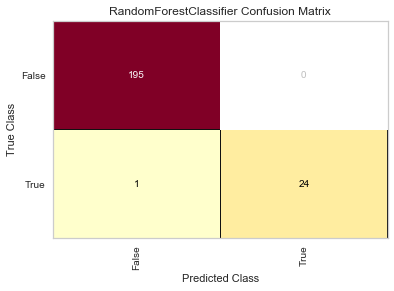

0.9990641711229946


In [56]:
ml_model(training_2002, testing_2002, data_2002)

0.9894179894179894
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       168
        True       0.95      0.95      0.95        21

    accuracy                           0.99       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.99      0.99      0.99       189



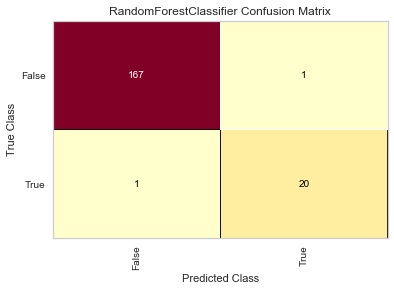

0.9990641711229946


In [57]:
ml_model(training_2003, testing_2003, data_2003)

0.9832402234636871
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       128
        True       1.00      0.94      0.97        51

    accuracy                           0.98       179
   macro avg       0.99      0.97      0.98       179
weighted avg       0.98      0.98      0.98       179



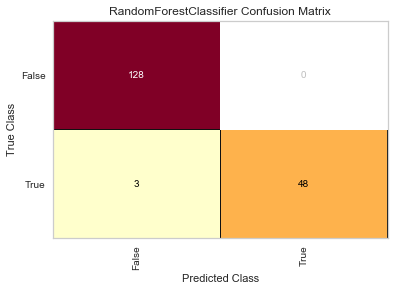

0.9990641711229946


In [58]:
ml_model(training_2004, testing_2004,  data_2004)

0.979381443298969
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       123
        True       1.00      0.94      0.97        71

    accuracy                           0.98       194
   macro avg       0.98      0.97      0.98       194
weighted avg       0.98      0.98      0.98       194



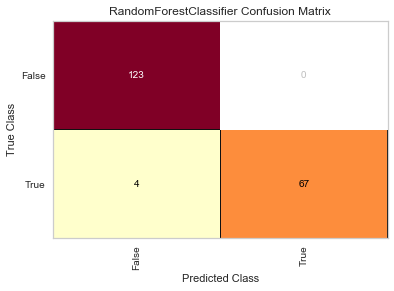

0.9990641711229946


In [59]:
ml_model(training_2005, testing_2005,  data_2005)

0.9949238578680203
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       177
        True       1.00      0.95      0.97        20

    accuracy                           0.99       197
   macro avg       1.00      0.97      0.99       197
weighted avg       0.99      0.99      0.99       197



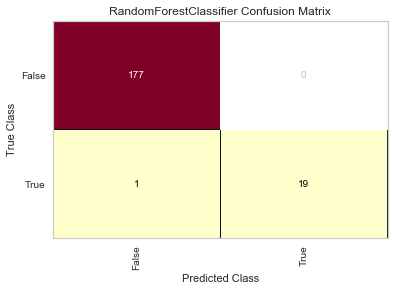

0.9990641711229946


In [60]:
ml_model(training_2006, testing_2006,  data_2006)

0.9887640449438202
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       151
        True       1.00      0.93      0.96        27

    accuracy                           0.99       178
   macro avg       0.99      0.96      0.98       178
weighted avg       0.99      0.99      0.99       178



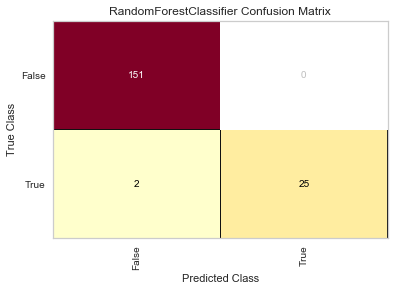

0.9990641711229946


In [61]:
ml_model(training_2007, testing_2007,  data_2007)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       136
        True       1.00      1.00      1.00        26

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



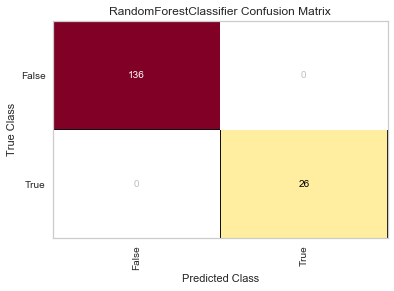

0.9990641711229946


In [62]:
ml_model(training_2008, testing_2008,  data_2008)

0.995475113122172
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       202
        True       1.00      0.95      0.97        19

    accuracy                           1.00       221
   macro avg       1.00      0.97      0.99       221
weighted avg       1.00      1.00      1.00       221



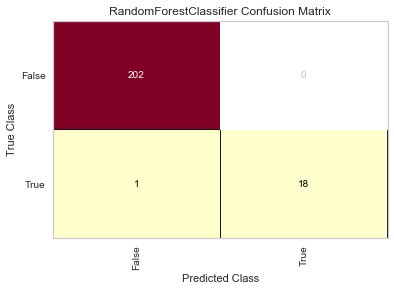

0.9990641711229946


In [63]:
ml_model(training_2009, testing_2009,  data_2009)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       286
        True       1.00      1.00      1.00        24

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



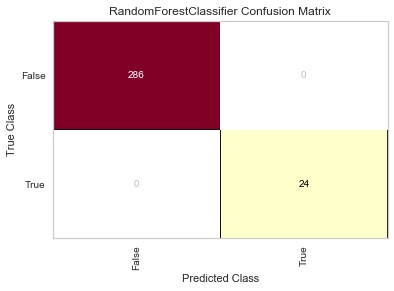

0.9990641711229946


In [64]:
ml_model(training_2010, testing_2010,  data_2010)

0.9913793103448276
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       204
        True       1.00      0.93      0.96        28

    accuracy                           0.99       232
   macro avg       1.00      0.96      0.98       232
weighted avg       0.99      0.99      0.99       232



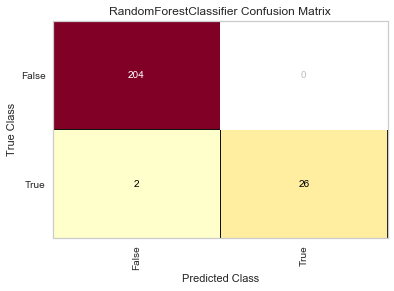

0.9990641711229946


In [65]:
ml_model(training_2011, testing_2011,  data_2011)

0.983957219251337
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       143
        True       1.00      0.93      0.96        44

    accuracy                           0.98       187
   macro avg       0.99      0.97      0.98       187
weighted avg       0.98      0.98      0.98       187



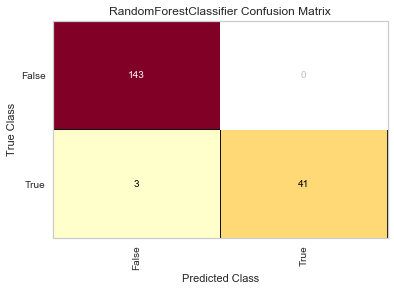

0.9990641711229946


In [66]:
ml_model(training_2012, testing_2012,  data_2012)

0.9953703703703703
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       191
        True       1.00      0.96      0.98        25

    accuracy                           1.00       216
   macro avg       1.00      0.98      0.99       216
weighted avg       1.00      1.00      1.00       216



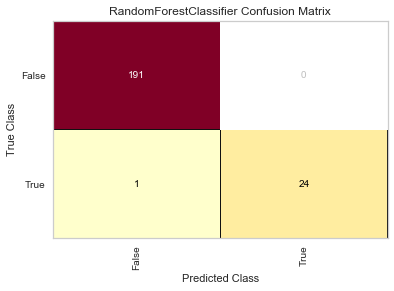

0.9990641711229946


In [67]:
ml_model(training_2013, testing_2013, data_2013)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       203
        True       1.00      1.00      1.00        23

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



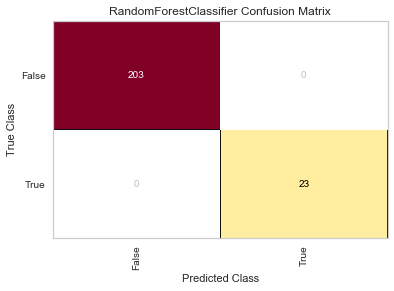

0.9990641711229946


In [68]:
ml_model(training_2014, testing_2014,  data_2014)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        63
        True       1.00      1.00      1.00        11

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



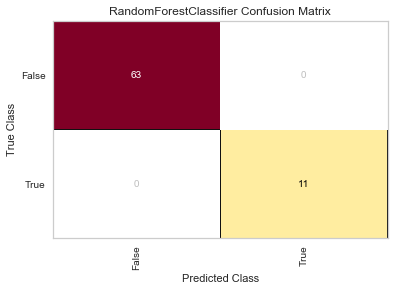

0.9990641711229946


In [69]:
ml_model(training_2015, testing_2015, data_2015)

In [70]:
final_data = pd.concat([data_1999, data_2000, data_2002, data_2003, data_2004, data_2005, data_2006, data_2007, data_2008, data_2009, data_2010, data_2011, data_2012, data_2013, , data_2014, data_2015])
final_data.to_csv('C:/Users/jayan/OneDrive/Documents/GitHub/Bankruptcy-Prediction/Data/data3.0.csv')

SyntaxError: invalid syntax (<ipython-input-70-017d2b0d705e>, line 1)